In [17]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.optim as optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader

In [14]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])
train_dataset=datasets.MNIST(
    root='data',
    train=True,
    transform=transform,
    download=True
)
test_dataset=datasets.MNIST(
    root='data',
    train=False,
    transform=transform,
    download=True
)

In [15]:
len(train_dataset)

60000

In [16]:
len(test_dataset)

10000

In [18]:
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=64)
test_loader=DataLoader(test_dataset,shuffle=True,batch_size=64)

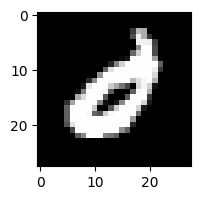

In [21]:
data_iter=iter(train_loader)
images,labels=next(data_iter)
plt.figure(figsize=(2,2))
plt.imshow(images[0].squeeze(),cmap='gray')
plt.show()

In [46]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.network(x)

In [47]:
model=DigitClassifier()
optimizer=optim.Adam(model.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

In [48]:
epochs=5

for epoch in range(epochs):
    running_loss=0.0
    for images,Labels in train_loader:
        predicted_labels=model(images)
        
        loss=criterion(predicted_labels,Labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(f"Epoch:{epoch},\tLoss:{running_loss/len(train_loader):.2f}")
    
        

Epoch:0,	Loss:0.40
Epoch:1,	Loss:0.19
Epoch:2,	Loss:0.13
Epoch:3,	Loss:0.11
Epoch:4,	Loss:0.09


In [51]:
model.eval()

correct=0
total=0

with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        _,predicted=torch.max(outputs.data,axis=1)
        correct+=(predicted==labels).sum().item()
        total+=labels.size(0)
    print(f"Accuracy: {100*correct/total:.2f}")

Accuracy: 96.51


In [52]:
total

10000

In [53]:
correct

9651